In [1]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #Keras dataset generator class.
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from PIL import Image
import numpy as np
import os
import glob
import pandas as pd
import Augmentor 
from skimage import feature
import random
%matplotlib inline
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Dataset Loading

In [3]:
dataset = []
inputPath=os.path.join("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/folder/RotatedImagesSpiral/training/healthy")
newDir=os.path.join("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/folder/RotatedImagesSpiral/training/")

for imagePaths in os.listdir(inputPath):
        # imagePath contains name of the image 
        inputPathh = os.path.join(inputPath, imagePaths)

# Image 

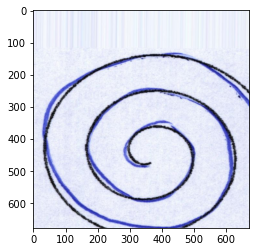

In [4]:
image=Image.open(inputPathh)
plt.imshow(image)
plt.show()

# Augmentation Started

In [5]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

datagen = ImageDataGenerator(rotation_range =15, 
                     width_shift_range = 0.2, 
                     height_shift_range = 0.2,  
                     rescale=1./255, 
                     shear_range=0.2, 
                     zoom_range=0.2, 
                     horizontal_flip = True, 
                     fill_mode = 'nearest', 
                     data_format='channels_last', 
                     brightness_range=[0.5, 1.5])     

# datagen = ImageDataGenerator(
#         rotation_range=30, 
#         width_shift_range=0.3,
#         height_shift_range=0.3, 
#         shear_range=0.2, 
#         zoom_range=0.2,
#         horizontal_flip=True, 
#         vertical_flip=True,
#         fill_mode='nearest')

# List  of files present in directory

In [5]:
filenames = next(os.walk("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/Spiral_HandPD/SpiralControl"))[2]
filenames

StopIteration: 

# Saving in folder

In [ ]:
for img in filenames:
    img = load_img("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/Spiral_HandPD/SpiralControl/"+img)
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in datagen.flow (x, batch_size=1, save_to_dir =newDir+'Healthy', save_prefix ='aug', save_format='jpg'):
        i+=1
        if i>3:
             break

# #For one image how augmentation worked

# #Rotation of image

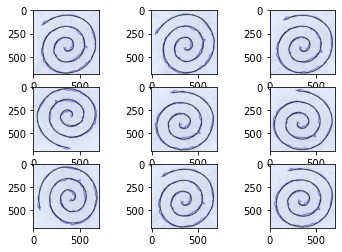

In [53]:
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generated = ImageDataGenerator(rotation_range=90)
it = data_generated.flow(samples, batch_size=10)

for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()
    
#         plt.subplot(330+1+i)
#         plt.imshow(.reshape(28,28),cmap=plt.get_cmap('gray'))
#     plt.show()
#     break

# Vertical Shift

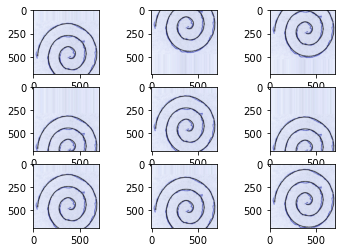

In [5]:
data = img_to_array(image)
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(height_shift_range=0.5)
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Horizontal Shift

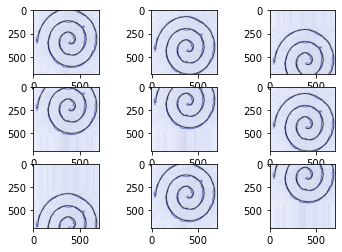

In [37]:
data = img_to_array(image)
samples = expand_dims(data, 0)
# data_generator = ImageDataGenerator(width_shift_range=[-100,100])
it = data_generator.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Color Space

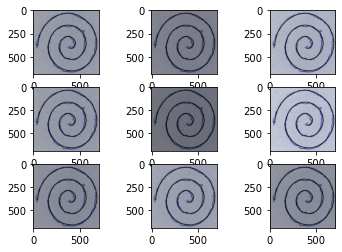

In [38]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Zooming

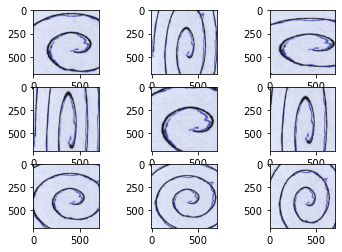

In [39]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.2,1.0])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    plt.imshow(result)
plt.show()

# Flipping

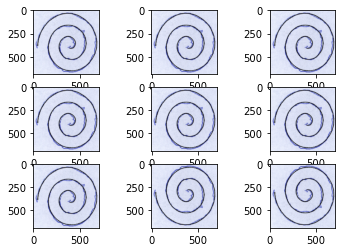

In [42]:
data = img_to_array(image)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1,save_to_dir=imagepath)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint8')
    datagen.flow(samples, batch_size=1,save_to_dir=imagepath)
    plt.imshow(result)
plt.show()

# CNN started

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
spiral_train_generator = train_datagen.flow_from_directory("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/BIN_notinuse/Created_dataset/spiral/training",
                                                   target_size = (128,128),
                                                   color_mode="grayscale",
                                                   batch_size = 32,
                                                   class_mode = 'categorical')

spiral_test_generator = test_datagen.flow_from_directory("C:/Users/Admin/JupyterProjectas/Parkinson's_mini_project/Again_tryy/BIN_notinuse/Created_dataset/spiral/testing/",
                                                   target_size = (128,128),
                                                   color_mode="grayscale",
                                                   batch_size = 32,
                                                   class_mode = 'categorical')

Found 359 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [10]:
def parkinson_disease_detection_model(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))
    
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model= parkinson_disease_detection_model(input_shape=(128, 128, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [12]:
hist = model.fit(spiral_train_generator, batch_size=12, epochs=20, validation_data=spiral_test_generator,)

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 0.8543 - accuracy: 0.5181 - val_loss: 0.8525 - val_accuracy: 0.5597
Epoch 2/20
12/12 [==============================] - 24s 2s/step - loss: 0.8519 - accuracy: 0.5070 - val_loss: 0.8507 - val_accuracy: 0.5597
Epoch 3/20
12/12 [==============================] - 24s 2s/step - loss: 0.8531 - accuracy: 0.5097 - val_loss: 0.8488 - val_accuracy: 0.5597
Epoch 4/20
12/12 [==============================] - 24s 2s/step - loss: 0.8484 - accuracy: 0.4986 - val_loss: 0.8470 - val_accuracy: 0.5597
Epoch 5/20
12/12 [==============================] - 23s 2s/step - loss: 0.8487 - accuracy: 0.4875 - val_loss: 0.8459 - val_accuracy: 0.5597
Epoch 6/20
12/12 [==============================] - 23s 2s/step - loss: 0.8482 - accuracy: 0.5097 - val_loss: 0.8447 - val_accuracy: 0.5522
Epoch 7/20
12/12 [==============================] - 23s 2s/step - loss: 0.8476 - accuracy: 0.5014 - val_loss: 0.8432 - val_accuracy: 0.5299
Epoch 8/20
12/12 [==

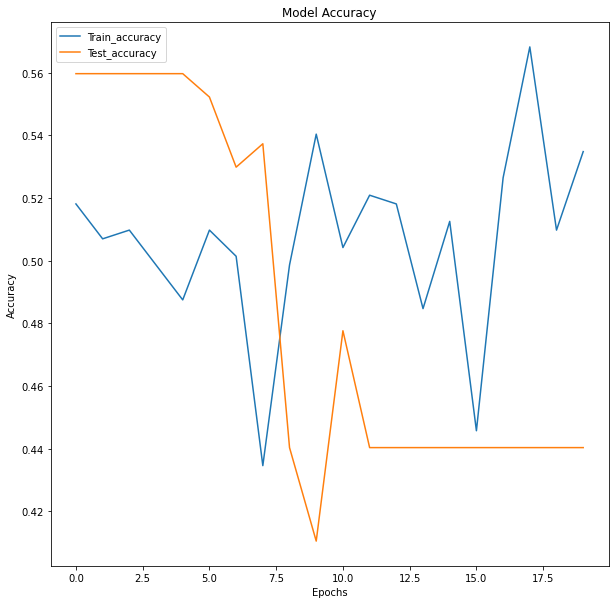

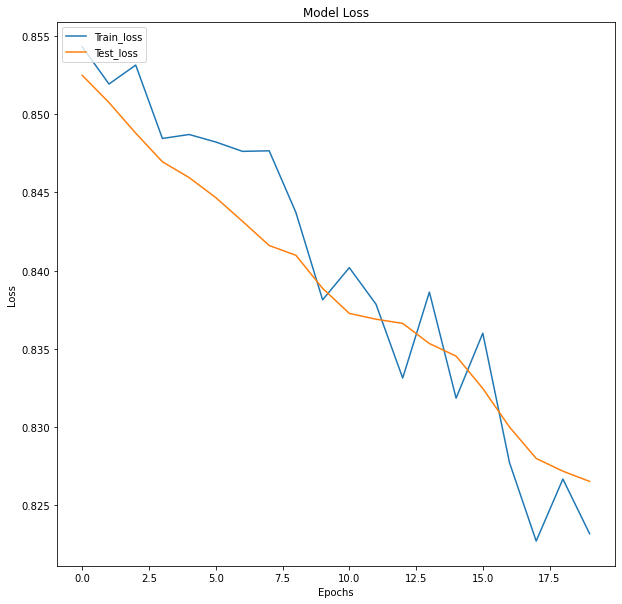

In [13]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [14]:
ypred = model.predict(spiral_train_generator)


In [15]:
ypred = np.argmax(ypred, axis=1)


In [17]:
y_test_pred = model.predict(spiral_train_generator)

In [18]:
y_test_pred = np.argmax(y_test_pred, axis=1)


In [19]:
print(classification_report(y_test_pred, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       359

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



In [20]:
matrix = confusion_matrix(y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

ValueError: Shape of passed values is (1, 1), indices imply (2, 2)

In [21]:
model.save('parkinson_disease_detection.h5')

# Testing of model

In [22]:
labels = ['Healthy', 'Parkinson']
image_healthy = cv2.imread('C:/Users/Admin/Downloads/1.png')
image_parkinson = cv2.imread('C:/Users/Admin/Downloads/2.png')

image_healthy = cv2.resize(image_healthy, (128, 128))
image_healthy = cv2.cvtColor(image_healthy, cv2.COLOR_BGR2GRAY)
image_healthy = np.array(image_healthy)
image_healthy = np.expand_dims(image_healthy, axis=0)
image_healthy = np.expand_dims(image_healthy, axis=-1)

image_parkinson = cv2.resize(image_parkinson, (128, 128))
image_parkinson = cv2.cvtColor(image_parkinson, cv2.COLOR_BGR2GRAY)
image_parkinson = np.array(image_parkinson)
image_parkinson = np.expand_dims(image_parkinson, axis=0)
image_parkinson = np.expand_dims(image_parkinson, axis=-1)

In [23]:
ypred_healthy = model.predict(image_healthy)
ypred_parkinson = model.predict(image_parkinson)

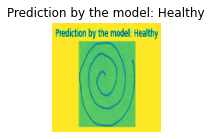

In [24]:
figure = plt.figure(figsize=(2, 2))
img_healthy = np.squeeze(image_healthy, axis=0)
plt.imshow(img_healthy)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_healthy[0], axis=0)]}')
plt.show()

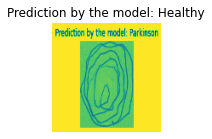

In [25]:
figure = plt.figure(figsize=(2, 2))
image_parkinson = np.squeeze(image_parkinson, axis=0)
plt.imshow(image_parkinson)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_parkinson[0], axis=0)]}')
plt.show()